In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [147]:
#Initializing dataframes
df1=pd.read_csv("C:\\Users\\srini\\Downloads\\subject-info.csv")

df2=pd.read_csv("C:\\Users\\srini\\Downloads\\test_measure.csv")


In [149]:
merged_df=pd.merge(df1, df2, on=['ID','ID_test'],how='outer')

In [67]:
#65.Calculate the percentage of male athletes who exceeded, the maximum treadmill speed of female athletes .

# Finding max speed of female athletes
max_female_speed = merged_df[merged_df['Sex'] == 1]['Speed'].max()

# Finding male athletes count
male_athletes = merged_df[merged_df['Sex'] == 0]

# Finding males who are faster than the max female speed
males_faster_female =  merged_df[(merged_df['Sex'] == 0) & (merged_df['Speed'] > max_female_speed)]

# Calculate percentage 
percent_males_faster_female = (len(males_faster_female) / len(male_athletes)) * 100

print(f'Percentage of male athletes faster than the fastest female: {percent_males_faster_female:.2f}%')

Percentage of male athletes faster than the fastest female: 0.88%


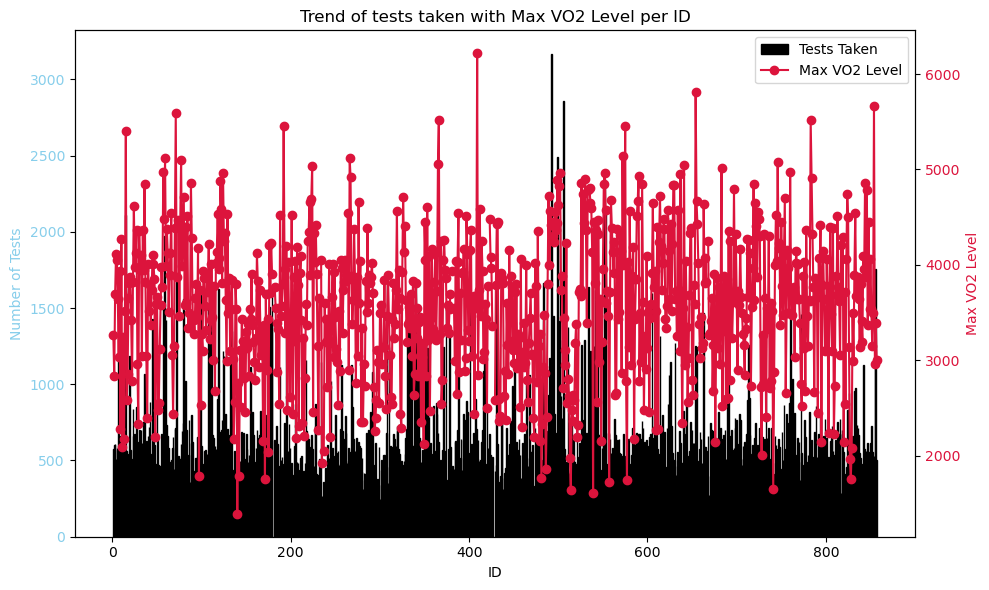

In [69]:
#66.Visualize the number of test taken by participants and their trend of maximum Vo2 level as dual chart ?

#Using matlplotlib -Find number of tests and max VO2 for each ID
Agg_VO2 = df2.groupby('ID').agg(num_tests_taken=('VO2', 'count'),
    max_vo2=('VO2', 'max')).reset_index()

fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot: Number of tests
bar = ax1.bar(Agg_VO2['ID'], Agg_VO2['num_tests_taken'],color='black',edgecolor='black', label='Tests Taken')
ax1.set_xlabel('ID')
ax1.set_ylabel('Number of Tests', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')

ax2 = ax1.twinx()

# Line plot: Max VO2 trend
line = ax2.plot(Agg_VO2['ID'], Agg_VO2['max_vo2'], color='crimson', marker='o', label='Max VO2 Level')
ax2.set_ylabel('Max VO2 Level', color='crimson')
ax2.tick_params(axis='y', labelcolor='crimson')

plt.title('Trend of tests taken with Max VO2 Level per ID')
fig.legend(loc='upper right', bbox_to_anchor=(1, 1), bbox_transform=ax1.transAxes)
plt.tight_layout()
plt.show()

C:\Users\srini\AppData\Local\Temp\ipykernel_51072\192262344.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Sex', y='Age', data=df1,palette='Blues')


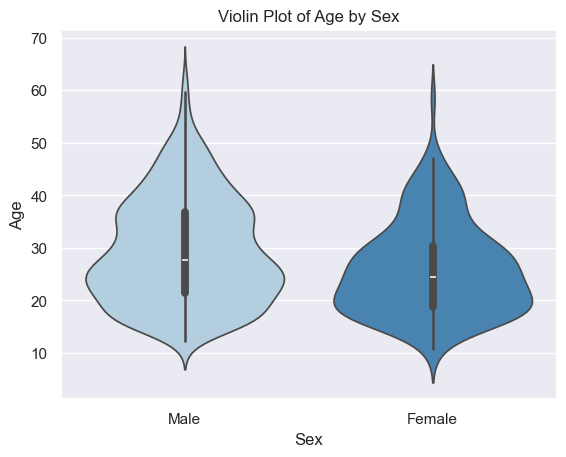

In [71]:
#67.Create violin chart for any two column from the dataset ?

sns.set_theme(style='darkgrid')
sns.violinplot(x='Sex', y='Age', data=df1,palette='Blues')
plt.xticks([0, 1], ['Male', 'Female'])
plt.xlabel('Sex')
plt.ylabel('Age')
plt.title('Violin Plot of Age by Sex')
plt.show()

In [157]:
#68. calculate BSA (Body surface area) without using function and store as column in dataframe and categorize . 

# Used formula from google to calculate BSA
temp_df = df1.copy()
temp_df['BSA'] = np.sqrt((temp_df['Height'] * temp_df['Weight']) / 3600)

#Categorize BSA 
temp_df.loc[temp_df['BSA'] < 1.5, 'BSA Category'] = 'Low BSA'
temp_df.loc[(temp_df['BSA'] >= 1.5) & (temp_df['BSA'] <= 2.0), 'BSA Category'] = 'Normal BSA'
temp_df.loc[temp_df['BSA'] > 2.0, 'BSA Category'] = 'High BSA'

print(temp_df)

      Age  Weight  Height  Humidity  Temperature  Sex   ID ID_test       BSA  \
0    10.8    48.8   163.0      39.0         20.7    1  543   543_1  1.486457   
1    11.8    41.0   150.0      41.0         22.3    1   11    11_1  1.307032   
2    12.2    46.0   160.0      37.0         21.5    0  829   829_1  1.429841   
3    13.2    71.0   190.0      49.0         23.8    1  284   284_1  1.935774   
4    13.7    53.8   169.7      40.0         25.3    0  341   341_1  1.592505   
..    ...     ...     ...       ...          ...  ...  ...     ...       ...   
987  59.1    64.7   172.0      38.0         24.4    0  856   856_2  1.758187   
988  59.7    65.2   172.0      51.0         16.8    0  856   856_3  1.764968   
989  61.3   102.0   185.0      56.0         20.5    0  390   390_1  2.289469   
990  61.6    74.0   169.0      46.0         23.9    0  596   596_1  1.863837   
991  63.0    83.5   171.5      48.0         22.2    0  296   296_1  1.994454   

    BSA Category  
0        Low BSA  
1

In [87]:
#69. Write a python function that efficiently processes large data into chunks to analyze average heart rate and maximum oxygen consumption for each test. Print the chunks during processing.

#   Function to process a large CSV file in chunks of 300k and print average HR and maximum VO2 grouped by ID_test.
    
def process_data_in_chunks(file_path, chunk_size=300000):
 
    try:
        chunk_iter = pd.read_csv(file_path, chunksize=chunk_size)
        
        chunk_index = 1  
        for chunk in chunk_iter:
            try:
                # Group by ID_test and calculate average HR and max VO2
                chunk_group = chunk.groupby('ID_test').agg(
                    avg_HR=('HR', 'mean'),
                    max_VO2=('VO2', 'max')
                ).reset_index()

                print(f'Chunk {chunk_index}:')
                print(chunk_group)
                print('*' * 50) # Chunk seperator

                chunk_index += 1  # Increment the chunk counter

            except Exception as e:
                print(f'Error processing chunk {chunk_index}: {e}')
                chunk_index += 1  # Increment even on error to keep the count consistent

    except FileNotFoundError:
        print(f'Error: The file {file_path} was not found.')
    except pd.errors.EmptyDataError:
        print('Error: The file is empty or not readable.')
    except Exception as e:
        print(f'An unexpected error occurred: {e}')

#Function call with the dataset given
process_data_in_chunks('test_measure.csv')

Chunk 1:
    ID_test      avg_HR  max_VO2
0     100_1  133.684211   3272.0
1     101_1  154.113924   3093.0
2     102_1  167.868347   3935.0
3     103_1  153.094643   3861.0
4     104_1  139.322751   3568.0
..      ...         ...      ...
518    98_1  130.848696   3741.0
519    99_1  129.361552   2278.0
520   99_47  137.295302   2029.0
521   99_54  143.697880   2532.0
522     9_1  156.112128   2282.0

[523 rows x 3 columns]
**************************************************
Chunk 2:
    ID_test      avg_HR  max_VO2
0     452_1  147.302326   1890.0
1     453_1  139.620968   3801.0
2     454_1  138.326279   2917.0
3     455_1  161.949721   3271.0
4     456_1  161.330203   3237.0
..      ...         ...      ...
465   855_6  135.159609   2956.0
466   856_1  128.390716   3230.0
467   856_2  130.927419   3391.0
468   856_3  127.193861   2922.0
469   857_1  167.268390   3002.0

[470 rows x 3 columns]
**************************************************


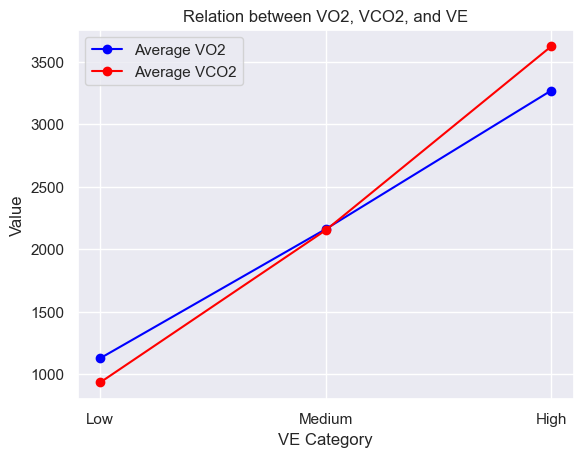

In [151]:
#70. How does the body's production of carbon dioxide related to the consumption of oxygen with increasing levels of pulmonary ventilation during GET? 

# Creating bins for VE (Low, Medium, High)
VE_bins = [0, 40, 80, 200]  
bin_labels = ['Low', 'Medium', 'High'] 
temp_df = df2.copy()
temp_df['VE_Category'] = pd.cut(temp_df['VE'], bins=VE_bins, labels=bin_labels, right=False)

# Grouping data by VE_Category 
group_VE_bins = temp_df.groupby('VE_Category',observed=False).agg({'VO2': 'mean', 'VCO2': 'mean'}).reset_index()

# Plotting VO2, VCO2, RQ against VE Categories
plt.plot(group_VE_bins['VE_Category'], group_VE_bins['VO2'], marker='o', label='Average VO2', color='blue')
plt.plot(group_VE_bins['VE_Category'], group_VE_bins['VCO2'], marker='o', label='Average VCO2', color='red')

plt.xlabel('VE Category')
plt.ylabel('Value')
plt.title('Relation between VO2, VCO2, and VE')
plt.legend()

plt.show()

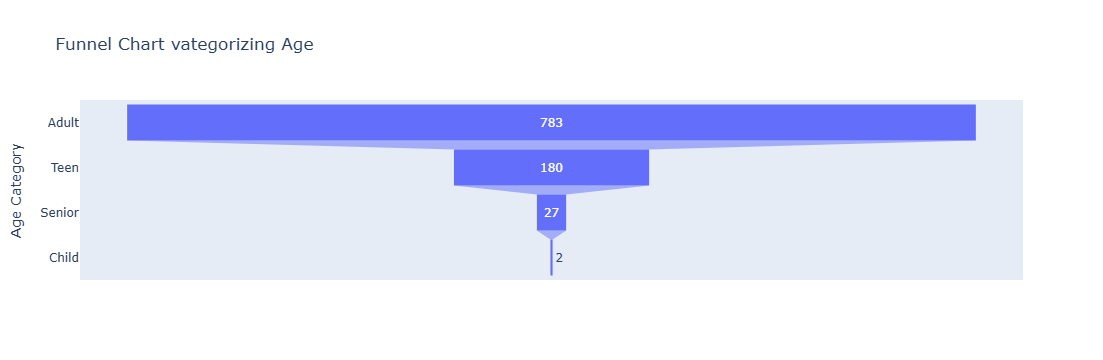

In [101]:
#71. Create a Funnel chart of Age Category (Child, Teen, Adult and Senior) ?

#Categorize the data based on ages
def categorize_age(age):
    if age <= 12:
        return 'Child'
    elif 13 <= age <= 19:
        return 'Teen'
    elif 20 <= age <= 64:
        return 'Adult'
    else:
        return 'Senior'

# Counting the number of people in each category
category_counts = pd.Series(df1['Age'].apply(categorize_age).value_counts())

category_counts_sorted = category_counts.sort_values(ascending=False)

funnel_data = pd.DataFrame({
    'Age Category': category_counts_sorted.index,
    'Count': category_counts_sorted.values
})

fig = px.funnel(funnel_data, x='Count', y='Age Category', title='Funnel chart categorizing Age')
fig.show()


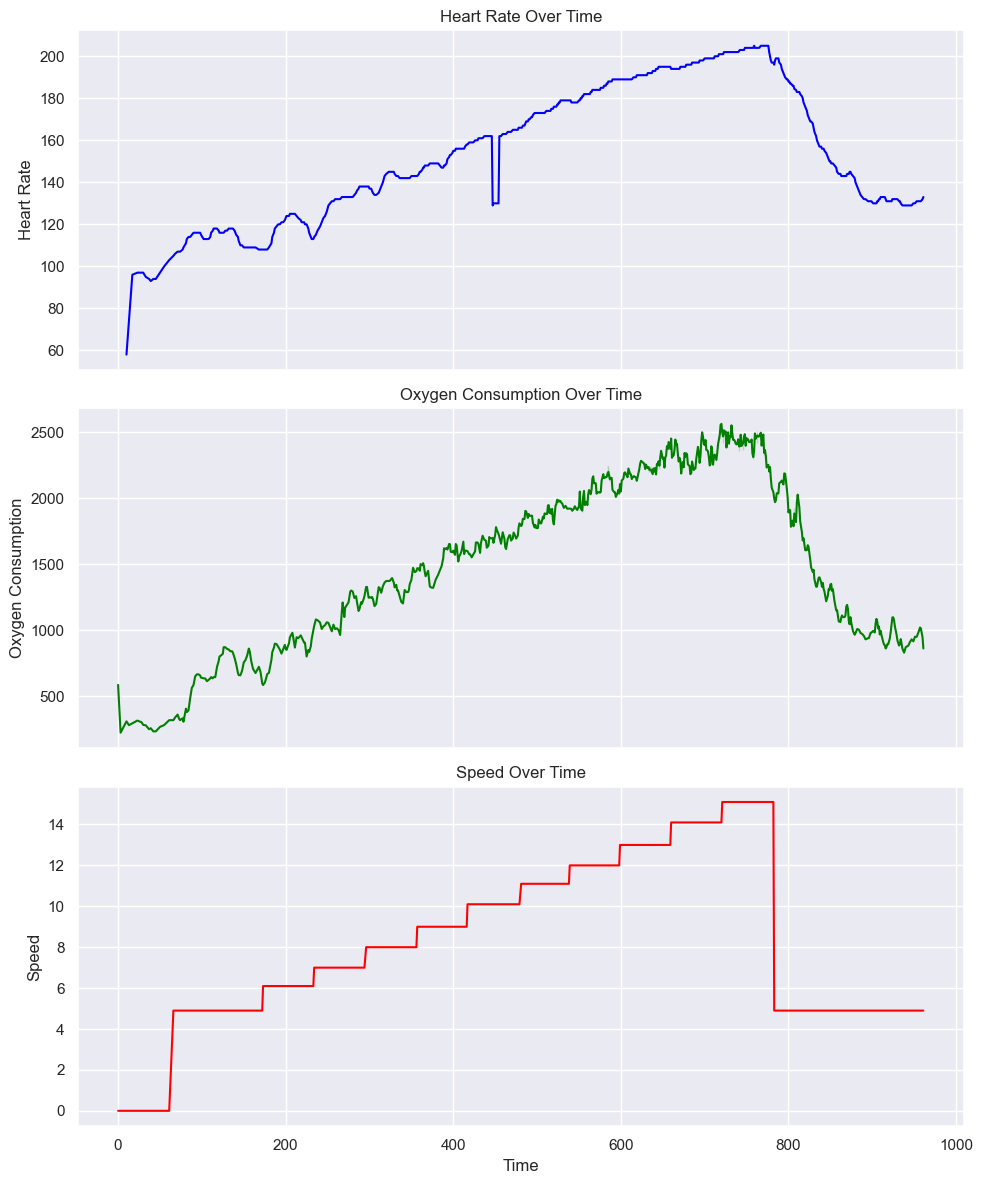

In [103]:
#72.visualize different physiological parameters over time for a specific test of an athlete using multiple panels?

#As the number of athletes are more, am showing for one athelete with ID=543
df_athlete = df2[df2['ID'] == 543]

# Creating a graph with multiple subplots (3 rows, 1 column)
fig, axes = plt.subplots(3, 1, figsize=(10, 12), sharex=True)

# Plotting HR in the first subplot
sns.lineplot(x='time', y='HR', data=df_athlete, ax=axes[0], color='blue')
axes[0].set_title('Heart Rate Over Time')
axes[0].set_ylabel('Heart Rate')

# Plotting VO2 in the second subplot
sns.lineplot(x='time', y='VO2', data=df_athlete, ax=axes[1], color='green')
axes[1].set_title('Oxygen Consumption Over Time')
axes[1].set_ylabel('Oxygen Consumption')

# Plotting speed in the third subplot
sns.lineplot(x='time', y='Speed', data=df_athlete, ax=axes[2], color='red')
axes[2].set_title('Speed Over Time')
axes[2].set_ylabel('Speed')

# Setting X-axis lable common for all plots
axes[2].set_xlabel('Time')

plt.tight_layout()
plt.show()

In [105]:
#73.Print first 10 records of the subject_info based on ID, without using head() method.

# Assuming that I need to print the same output as head() without using predefined function
first_10_records = []
counter = 0
for index, row in df1.iterrows():
    if counter < 10:
        first_10_records.append(row)  
        counter += 1
    else:
        break

# Convert the list of rows back into a DataFrame and print
first_10_df1 = pd.DataFrame(first_10_records)
print(first_10_df1.to_string(index=False))

 Age  Weight  Height  Humidity  Temperature  Sex  ID ID_test      BSA BSA Category
10.8    48.8   163.0      39.0         20.7    1 543   543_1 1.486457      Low BSA
11.8    41.0   150.0      41.0         22.3    1  11    11_1 1.307032      Low BSA
12.2    46.0   160.0      37.0         21.5    0 829   829_1 1.429841      Low BSA
13.2    71.0   190.0      49.0         23.8    1 284   284_1 1.935774   Normal BSA
13.7    53.8   169.7      40.0         25.3    0 341   341_1 1.592505   Normal BSA
13.8    53.4   171.0      42.0         24.4    0 341   341_2 1.592639   Normal BSA
14.0    46.0   160.0      40.0         25.3    0 343   343_1 1.429841      Low BSA
14.1    50.0   168.9      42.0         24.2    0 330   330_1 1.531611   Normal BSA
14.1    47.2   160.2      40.0         25.2    0 338   338_1 1.449276      Low BSA
14.1    49.7   160.1      40.0         25.8    0 339   339_1 1.486697      Low BSA


In [127]:
#74. Determine the treadmill speed range and age range in which you observe the highest average heart rate.

# Defining bins for age and  speed
age_bins = [0,20, 30, 40, 50, 60, 70]
speed_bins = [0, 5, 10, 15,20,25]

merged_df1 = merged_df.copy()

# Label the bins
age_labels = ['0-20','21-30', '31-40', '41-50', '51-60', '61-70']
speed_labels = ['0-5', '6-10', '11-15','16-20','21-25']

merged_df1['age_group'] = pd.cut(merged_df1['Age'], bins=age_bins, labels=age_labels, right=False)
merged_df1['speed_group'] = pd.cut(merged_df1['Speed'], bins=speed_bins, labels=speed_labels, right=False)

# Grouping by age and speed ranges and calculate mean heart rate
grouped = merged_df1.groupby(['age_group', 'speed_group'],observed=False)['HR'].mean().reset_index()

# Finding the row with the highest average heart rate
max_avg_HR_row = grouped.loc[grouped['HR'].idxmax()]

print('Highest average heart rate observed in:')
print(f'Age Group: {max_avg_HR_row['age_group']}')
print(f'Speed Group: {max_avg_HR_row['speed_group']}')
print(f'Average Heart Rate: {max_avg_HR_row['HR']} ')

Highest average heart rate observed in:
Age Group: 0-20
Speed Group: 16-20
Average Heart Rate: 186.5471824686941 


In [165]:
#75. Identify subjects whose heart rate (HR) is consistently above their age group’s 75th percentile.

age_bins = [0, 20, 30, 40, 50, 60, 100]
age_labels = ['<20', '20-29', '30-39', '40-49', '50-59', '60+']
temp_df = merged_df.copy()  
temp_df['age_group'] = pd.cut(temp_df['Age'], bins=age_bins, labels=age_labels)

# Finding 75th percentile HR for each age group
percentile_75 = temp_df.groupby('age_group',observed=False)['HR'].quantile(0.75)

# Adding 75th percentile HR to temp_df
temp_df = temp_df.merge(percentile_75, on='age_group', suffixes=('', '_75th_percentile'))

# Adding a column to indicate if HR is above the 75th percentile
temp_df['is_high'] = temp_df['HR'] > temp_df['HR_75th_percentile']

# Group by ID and check if all rows for that ID are True with 'is_high'
check_consistent_ids = temp_df.groupby('ID')['is_high'].all()

# Pick id's that have returned True in above statement
consistent_ids_true = check_consistent_ids[check_consistent_ids == True].index

# Result will hold all the ID's and its rows which are consistent
result = temp_df[temp_df['ID'].isin(consistent_ids_true)]

# Print the result
print('Atheletes with HR consistently above 75th percentile:')
print(result[['ID', 'Age', 'HR', 'age_group', 'HR_75th_percentile']])

Atheletes with HR consistently above 75th percentile:
Empty DataFrame
Columns: [ID, Age, HR, age_group, HR_75th_percentile]
Index: []


In [169]:
#76. list the participants ID and test _ID who started their warm up with speed less than 5km/h ?

temp_df = df2[df2['Speed'] < 5][['ID', 'ID_test','Speed']]

#Dropping duplicates based on all three columns
unique_filtered_df = temp_df.drop_duplicates()

print(unique_filtered_df)

         ID ID_test  Speed
1207      4     4_1    0.0
7433      1     1_1    0.0
7463      1     1_1    4.9
25655    38    38_1    0.0
25990    39    39_1    0.0
...     ...     ...    ...
572209  855   855_1    0.0
572223  855   855_1    4.9
572828  856   856_3    4.9
573447  856   856_2    4.9
574067  856   856_1    4.9

[601 rows x 3 columns]


In [177]:
#77. Calculate the mean VO2 max for male and female athletes in the Get Phase.

mean_vo2_by_sex = merged_df.groupby('Sex')['VO2'].mean().reset_index()

male_mean_vo2 = mean_vo2_by_sex[mean_vo2_by_sex['Sex'] == 0]['VO2'].values[0]
female_mean_vo2 = mean_vo2_by_sex[mean_vo2_by_sex['Sex'] == 1]['VO2'].values[0]

print(f'Mean VO2 max for Male:   {male_mean_vo2:.2f}')
print(f'Mean VO2 max for Female: {female_mean_vo2:.2f}')

Mean VO2 max for Male:   2406.24
Mean VO2 max for Female: 1681.91


In [181]:
#78. If you consider cool down time as the recovery period after reaching peak speed, display the participant details who has taken the longest Cool Down time.

#Find peak speed per ID
peak_speed_found = df2.groupby('ID')['Speed'].max()

#Calculating cool down times
cool_down_times = []

for ID, peak_speed in peak_speed_found.items():
    data = df2[df2['ID'] == ID]
    
    peak_time = data[data['Speed'] == peak_speed]['time'].iloc[0]
    
    after_peak = data[data['time'] > peak_time]
    cool_down = after_peak[after_peak['Speed'] < peak_speed]
    
    if not cool_down.empty:
        cool_down_time = (cool_down['time'].iloc[0] - peak_time)
        cool_down_times.append({'ID': ID, 'cool_down_time': cool_down_time})

#Creating temporary DataFrame to hold cool_down_times
cool_down_df = pd.DataFrame(cool_down_times)

#Retrieving ID and time with max cool_down
longest = cool_down_df.loc[cool_down_df['cool_down_time'].idxmax()]

print(f'ID with longest cool down time: {longest['ID']}')
print(f'Longest cool down time (seconds): {longest['cool_down_time']}')

ID with longest cool down time: 644
Longest cool down time (seconds): 202


In [185]:
#79. Identify the athlete who recorded the highest treadmill speed during the tests.

# Getting the max speed of the athletes 
max_speed_value = df2['Speed'].idxmax()

# Getting the row of that max speed 
max_speed_row = df2.loc[max_speed_value]

print(f'Athlete ID: {max_speed_row['ID']}, Speed: {max_speed_row['Speed']} ')

Athlete ID: 431, Speed: 23.1 


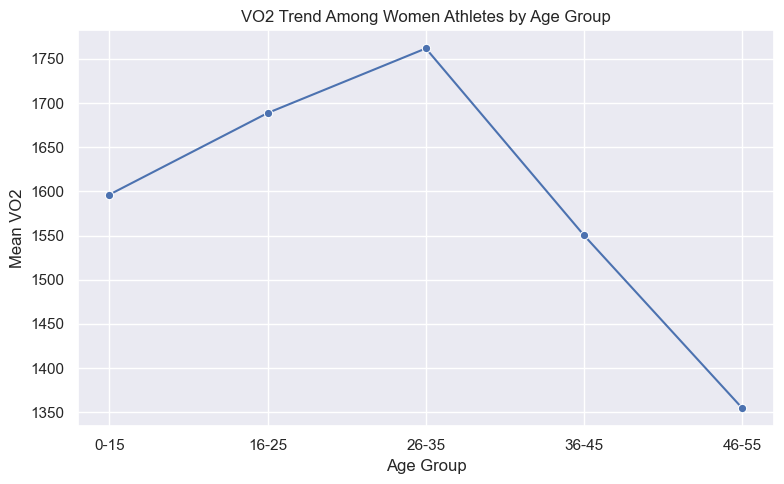

In [189]:
#80. Show the oxygen consumption trend analysis among women athletes across different age groups 

temp_df = merged_df[(merged_df['Sex'] == 1)]

age_bins = [0,15, 25, 35, 45, 55]
labels = ['0-15','16-25', '26-35', '36-45', '46-55']

# Calculate mean oxygen consumption by age group
grouped = temp_df.groupby(pd.cut(temp_df['Age'], bins=age_bins, labels=labels),observed=False)['VO2'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.lineplot(data=grouped, x='Age', y='VO2', marker='o')
plt.title('VO2 Trend Among Women Athletes by Age Group')
plt.ylabel('Mean VO2')
plt.xlabel('Age Group')
plt.grid(True)
plt.tight_layout()
plt.show()